In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import os

# Replace 'path/to/your/webdriver' with the path to the WebDriver you're using (e.g., chromedriver)


DRIVER_BIN = "/chromedriver"
options = webdriver.ChromeOptions()
service = Service()
target_folder = os.path.join(os.getcwd(), "downloads")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": target_folder,
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
options.add_argument("--headless")
driver = webdriver.Chrome(service=service,options=options)


In [2]:

# Go to the PowerSchool login page
driver.get('https://malaysiauadc2023.calicotab.com/uadc2023/tab/team/')
# Wait for the page to load completely
time.sleep(5)

h6_elements = driver.find_elements(By.CSS_SELECTOR, 'div.popover-header.d-flex h6.flex-grow-1')

span_content = driver.find_elements(By.CSS_SELECTOR, 'div.popover-body div.list-group-item span')

In [3]:
element_list = [element.get_attribute('innerHTML') for element in h6_elements]
teammate_list = [element.get_attribute('innerHTML') for element in span_content if not element.get_attribute('innerHTML').startswith("Total")]

In [4]:
school_history = dict()
teams = dict()


In [5]:
def remove_prefix(str, prefix):
    return str.lstrip(prefix)

In [28]:
cur = ""
idx=0
for txt in element_list:
    
    if(txt.startswith("Won") or txt.startswith("Lost")):
        name = remove_prefix(txt, "Won against ")
        name = remove_prefix(name, "Lost against ")
    else:
        name=txt
    teams[name] = teammate_list[idx].split(", ")
    idx+=1
    if not txt.startswith("Won") and not txt.startswith("Lost"):
        cur = txt
        school_history[cur] = []
    else:
        school_history[cur].append(txt)

        

In [29]:
print(school_history)

{'Ateneo de Manila University 1': ['Won against DTU PSA', 'Won against LUMS A', 'Won against Tokyo A', 'Won against DLSU C', 'Won against Sunway JRS', 'Won against IGNOU A', 'Won against NUS 1', 'Won against NUS 1'], 'UP Diliman A': ['Won against MSU-IIT A', 'Won against IIT KGP A', 'Lost to Sunway JRS', 'Won against BAC 1', 'Won against Binus A', 'Won against DTU DND', 'Won against NUS 2', 'Won against DLSU A'], 'Ateneo de Manila University 2': ['Lost to Mysore TBD', 'Won against BRAC A', 'Won against Ateneo de Manila University 4', 'Won against Malaya 2', 'Won against Ateneo de Manila University 5', 'Won against UP Diliman B', 'Won against IITB NRA', 'Won against Sunway JRS'], 'DTU 7': ['Won against BUTEX A', 'Won against Sunway KAM', 'Lost to DLSU C', 'Won against NTU B', 'Won against Ateneo de Manila University 3', 'Won against LUMS A', 'Won against DLSU A', 'Won against IGNOU A'], 'NUS 1': ['Won against XU - A', 'Won against NSU 1', 'Won against UPLB A', 'Won against Malaya 1', 'W

In [30]:
for i in teams:
    print(i,teams[i])

Ateneo de Manila University 1 ['Mikko Vitug', 'David Africa', 'Tobi Leung']
DTU PSA ['Pranav Gupta', 'Sarthak Tiwari', 'Anshuman Singh Malhotra']
UMS A ['Mohammad Huzaifa', 'Ahmad bin Tahir', 'Shezreen Shah']
Tokyo A ['Kotaro Yoshida', 'Nasa Tsuchiya', 'Yuichi Masaoka']
DLSU C ['Xanthipi Pontejos', 'Daniel Christopher Haduca', 'Mezen Lababidi']
Sunway JRS ['Shireen Ali', 'Jadon Lai', 'Rohan Subagaran']
IGNOU A ['Nitin Kumar Saidha', 'Chinmaya Mohan', 'Ishaan Sengupta']
NUS 1 ['Amy Lee', 'Cavan Tay', 'Shaun Lee']
UP Diliman A ['Bea Legaspi', 'Luigi Alcañeses', 'Luis Garcia']
MSU-IIT A ['Art Joseph S. Tarranza', 'Lodelyn A. Prado', 'Jayvee G. Bondoc']
IIT KGP A ['Abhijna Choodi', 'Sugandh Sinha', 'Diya Sarkar']
BAC 1 ['Cyril Joachim (CJ)', 'Ryan Rayner', 'Chris Chua']
Binus A ['Tengku Omar', 'Bobby Ongkojoyo', 'Leonardus Hans Sebastian']
DTU DND ['Himan Nayak', 'Saatvik Dabral', 'Shashwat Dash']
NUS 2 ['Ian Dylan Chai', 'Rdu Dillon', 'Rachel Chen']
DLSU A ['Ichiro Arbole', 'Therese Genot

In [31]:
driver.quit()


In [77]:

class Implementation:
    """
    A class that represents an implementation of the Elo Rating System
    """

    def __init__(self, base_rating=1000):
        """
        Runs at initialization of class object.
        @param base_rating - The rating a new player would have
        """
        self.base_rating = base_rating
        self.players = []

    def __getPlayerList(self):
        """
        Returns this implementation's player list.
        @return - the list of all player objects in the implementation.
        """
        return self.players

    def getPlayer(self, name):
        """
        Returns the player in the implementation with the given name.
        @param name - name of the player to return.
        @return - the player with the given name.
        """
        for player in self.players:
            if player.name == name:
                return player
        return None

    def contains(self, name):
        """
        Returns true if this object contains a player with the given name.
        Otherwise returns false.
        @param name - name to check for.
        """
        for player in self.players:
            if player.name == name:
                return True
        return False
    def applyUpdates(self):
        for player in self.players:
            player.rating += player.updates
            player.updates = 0
    def addPlayer(self, name, rating=None):
        """
        Adds a new player to the implementation.
        @param name - The name to identify a specific player.
        @param rating - The player's rating.
        """
        if rating == None:
            rating = self.base_rating

        self.players.append(_Player(name=name, rating=rating))

    def removePlayer(self, name):
        """
        Adds a new player to the implementation.
        @param name - The name to identify a specific player.
        """
        self.__getPlayerList().remove(self.getPlayer(name))

    def recordMatch(self, name1, name2, winner=None, draw=False):
        """
        Should be called after a game is played.
        @param name1 - name of the first player.
        @param name2 - name of the second player.
        """
        player1 = self.getPlayer(name1)
        player2 = self.getPlayer(name2)

        expected1 = player1.compareRating(player2)
        expected2 = player2.compareRating(player1)

        k = 16

        rating1 = player1.rating
        rating2 = player2.rating

        if draw:
            score1 = 0.5
            score2 = 0.5
        elif winner == name1:
            score1 = 1.0
            score2 = 0.0
        elif winner == name2:
            score1 = 0.0
            score2 = 1.0
        else:
            raise InputError("One of the names must be the winner or draw must be True")

        newRating1 = rating1 + k * (score1 - expected1)
        newRating2 = rating2 + k * (score2 - expected2)

        if newRating1 < 0:
            newRating1 = 0
            newRating2 = rating2 - rating1

        elif newRating2 < 0:
            newRating2 = 0
            newRating1 = rating1 - rating2

        player1.updates = newRating1-rating1
        player2.updates = newRating2-rating2
        # return rating1, score1, expected1, rating2, score2, expected2

    def getPlayerRating(self, name):
        """
        Returns the rating of the player with the given name.
        @param name - name of the player.
        @return - the rating of the player with the given name.
        """
        player = self.getPlayer(name)
        return player.rating

    def getRatingList(self):
        """
        Returns a list of tuples in the form of ({name},{rating})
        @return - the list of tuples
        """
        lst = []
        for player in self.__getPlayerList():
            lst.append((player.name, player.rating))
        return lst


class _Player:
    """
    A class to represent a player in the Elo Rating System
    """

    def __init__(self, name, rating):
        """
        Runs at initialization of class object.
        @param name - TODO
        @param rating - TODO
        """
        self.name = name
        self.rating = rating
        self.updates = 0

    def compareRating(self, opponent):
        """
        Compares the two ratings of the this player and the opponent.
        @param opponent - the player to compare against.
        @returns - The expected score between the two players.
        """
        return (1 + 10 ** ((opponent.rating - self.rating) / 400.0)) ** -1


In [78]:
# start with school_history which has list of teams and matchups
# teammate_list = list of teammates

r = Implementation()

In [ ]:
import os
file_path = os.path.join(os.getcwd(), 'rating_list.txt')
tmp_dict = {}

with open(file_path, 'r') as file:
    for line in file:
        name, rating = line.strip().split(': ')
        tmp_dict[name] = float(rating)


In [79]:
for name,ppl in teams.items():
    for person in ppl:
        if person not in tmp_dict:
            r.addPlayer(person,1500)
        else:
            r.addPlayer(person,tmp_dict[person])
print(r.getRatingList())

[('Mikko Vitug', 1500), ('David Africa', 1500), ('Tobi Leung', 1500), ('Pranav Gupta', 1500), ('Sarthak Tiwari', 1500), ('Anshuman Singh Malhotra', 1500), ('Mohammad Huzaifa', 1500), ('Ahmad bin Tahir', 1500), ('Shezreen Shah', 1500), ('Kotaro Yoshida', 1500), ('Nasa Tsuchiya', 1500), ('Yuichi Masaoka', 1500), ('Xanthipi Pontejos', 1500), ('Daniel Christopher Haduca', 1500), ('Mezen Lababidi', 1500), ('Shireen Ali', 1500), ('Jadon Lai', 1500), ('Rohan Subagaran', 1500), ('Nitin Kumar Saidha', 1500), ('Chinmaya Mohan', 1500), ('Ishaan Sengupta', 1500), ('Amy Lee', 1500), ('Cavan Tay', 1500), ('Shaun Lee', 1500), ('Bea Legaspi', 1500), ('Luigi Alcañeses', 1500), ('Luis Garcia', 1500), ('Art Joseph S. Tarranza', 1500), ('Lodelyn A. Prado', 1500), ('Jayvee G. Bondoc', 1500), ('Abhijna Choodi', 1500), ('Sugandh Sinha', 1500), ('Diya Sarkar', 1500), ('Cyril Joachim (CJ)', 1500), ('Ryan Rayner', 1500), ('Chris Chua', 1500), ('Tengku Omar', 1500), ('Bobby Ongkojoyo', 1500), ('Leonardus Hans Se

round 1 done
[('Mikko Vitug', 1508.0), ('David Africa', 1508.0), ('Tobi Leung', 1508.0), ('Pranav Gupta', 1492.0), ('Sarthak Tiwari', 1492.0), ('Anshuman Singh Malhotra', 1492.0), ('Mohammad Huzaifa', 1508.0), ('Ahmad bin Tahir', 1508.0), ('Shezreen Shah', 1508.0), ('Kotaro Yoshida', 1508.0), ('Nasa Tsuchiya', 1508.0), ('Yuichi Masaoka', 1508.0), ('Xanthipi Pontejos', 1508.0), ('Daniel Christopher Haduca', 1508.0), ('Mezen Lababidi', 1508.0), ('Shireen Ali', 1508.0), ('Jadon Lai', 1508.0), ('Rohan Subagaran', 1508.0), ('Nitin Kumar Saidha', 1508.0), ('Chinmaya Mohan', 1508.0), ('Ishaan Sengupta', 1508.0), ('Amy Lee', 1508.0), ('Cavan Tay', 1508.0), ('Shaun Lee', 1508.0), ('Bea Legaspi', 1508.0), ('Luigi Alcañeses', 1508.0), ('Luis Garcia', 1508.0), ('Art Joseph S. Tarranza', 1492.0), ('Lodelyn A. Prado', 1492.0), ('Jayvee G. Bondoc', 1492.0), ('Abhijna Choodi', 1508.0), ('Sugandh Sinha', 1508.0), ('Diya Sarkar', 1508.0), ('Cyril Joachim (CJ)', 1508.0), ('Ryan Rayner', 1508.0), ('Chris 

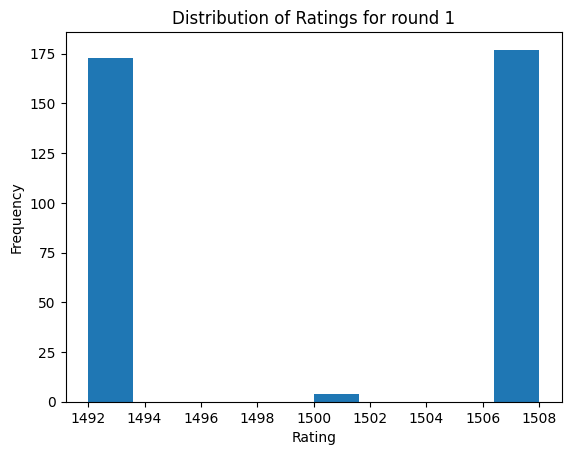

round 2 done
[('Mikko Vitug', 1516.0), ('David Africa', 1516.0), ('Tobi Leung', 1516.0), ('Pranav Gupta', 1500.0), ('Sarthak Tiwari', 1500.0), ('Anshuman Singh Malhotra', 1500.0), ('Mohammad Huzaifa', 1500.0), ('Ahmad bin Tahir', 1500.0), ('Shezreen Shah', 1500.0), ('Kotaro Yoshida', 1516.0), ('Nasa Tsuchiya', 1516.0), ('Yuichi Masaoka', 1516.0), ('Xanthipi Pontejos', 1516.0), ('Daniel Christopher Haduca', 1516.0), ('Mezen Lababidi', 1516.0), ('Shireen Ali', 1516.0), ('Jadon Lai', 1516.0), ('Rohan Subagaran', 1516.0), ('Nitin Kumar Saidha', 1516.0), ('Chinmaya Mohan', 1516.0), ('Ishaan Sengupta', 1516.0), ('Amy Lee', 1516.0), ('Cavan Tay', 1516.0), ('Shaun Lee', 1516.0), ('Bea Legaspi', 1516.0), ('Luigi Alcañeses', 1516.0), ('Luis Garcia', 1516.0), ('Art Joseph S. Tarranza', 1500.0), ('Lodelyn A. Prado', 1500.0), ('Jayvee G. Bondoc', 1500.0), ('Abhijna Choodi', 1500.0), ('Sugandh Sinha', 1500.0), ('Diya Sarkar', 1500.0), ('Cyril Joachim (CJ)', 1500.0), ('Ryan Rayner', 1500.0), ('Chris 

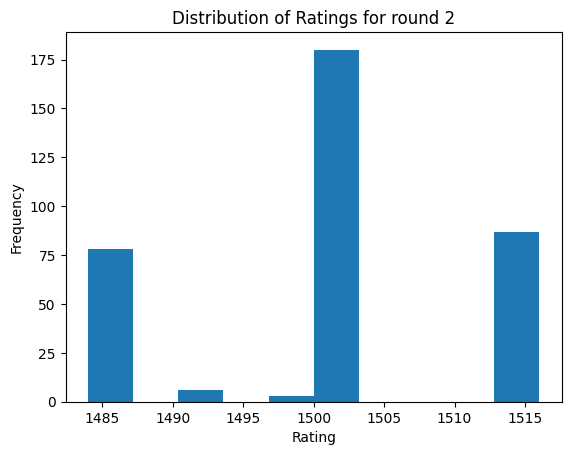

round 3 done
[('Mikko Vitug', 1524.0), ('David Africa', 1524.0), ('Tobi Leung', 1524.0), ('Pranav Gupta', 1507.631846603239), ('Sarthak Tiwari', 1507.631846603239), ('Anshuman Singh Malhotra', 1507.631846603239), ('Mohammad Huzaifa', 1508.0), ('Ahmad bin Tahir', 1508.0), ('Shezreen Shah', 1508.0), ('Kotaro Yoshida', 1508.0), ('Nasa Tsuchiya', 1508.0), ('Yuichi Masaoka', 1508.0), ('Xanthipi Pontejos', 1524.0), ('Daniel Christopher Haduca', 1524.0), ('Mezen Lababidi', 1524.0), ('Shireen Ali', 1524.0), ('Jadon Lai', 1524.0), ('Rohan Subagaran', 1524.0), ('Nitin Kumar Saidha', 1524.0), ('Chinmaya Mohan', 1524.0), ('Ishaan Sengupta', 1524.0), ('Amy Lee', 1524.0), ('Cavan Tay', 1524.0), ('Shaun Lee', 1524.0), ('Bea Legaspi', 1508.0), ('Luigi Alcañeses', 1508.0), ('Luis Garcia', 1508.0), ('Art Joseph S. Tarranza', 1508.0), ('Lodelyn A. Prado', 1508.0), ('Jayvee G. Bondoc', 1508.0), ('Abhijna Choodi', 1508.0), ('Sugandh Sinha', 1508.0), ('Diya Sarkar', 1508.0), ('Cyril Joachim (CJ)', 1508.0), 

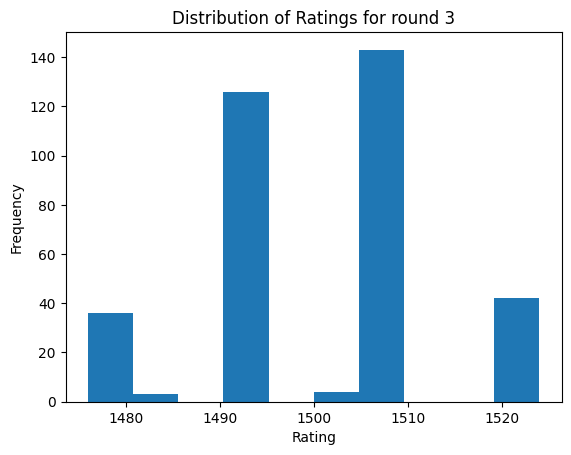

round 4 done
[('Mikko Vitug', 1532.0), ('David Africa', 1532.0), ('Tobi Leung', 1532.0), ('Pranav Gupta', 1499.2804186054157), ('Sarthak Tiwari', 1499.2804186054157), ('Anshuman Singh Malhotra', 1499.2804186054157), ('Mohammad Huzaifa', 1516.0), ('Ahmad bin Tahir', 1516.0), ('Shezreen Shah', 1516.0), ('Kotaro Yoshida', 1499.9915229579397), ('Nasa Tsuchiya', 1499.9915229579397), ('Yuichi Masaoka', 1499.9915229579397), ('Xanthipi Pontejos', 1516.0), ('Daniel Christopher Haduca', 1516.0), ('Mezen Lababidi', 1516.0), ('Shireen Ali', 1532.0), ('Jadon Lai', 1532.0), ('Rohan Subagaran', 1532.0), ('Nitin Kumar Saidha', 1532.0), ('Chinmaya Mohan', 1532.0), ('Ishaan Sengupta', 1532.0), ('Amy Lee', 1532.0), ('Cavan Tay', 1532.0), ('Shaun Lee', 1532.0), ('Bea Legaspi', 1516.0), ('Luigi Alcañeses', 1516.0), ('Luis Garcia', 1516.0), ('Art Joseph S. Tarranza', 1500.0), ('Lodelyn A. Prado', 1500.0), ('Jayvee G. Bondoc', 1500.0), ('Abhijna Choodi', 1516.0), ('Sugandh Sinha', 1516.0), ('Diya Sarkar', 15

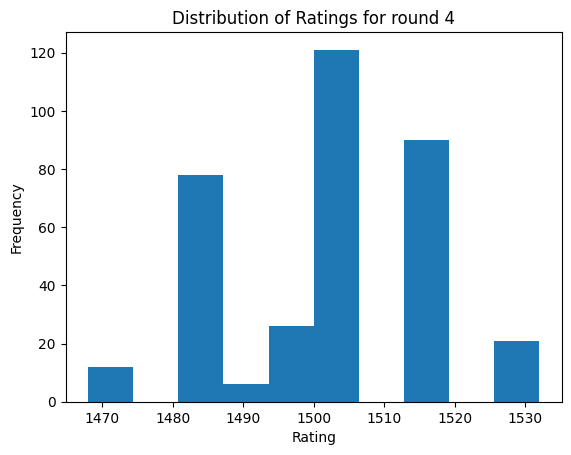

round 5 done
[('Mikko Vitug', 1540.0), ('David Africa', 1540.0), ('Tobi Leung', 1540.0), ('Pranav Gupta', 1490.9288006457657), ('Sarthak Tiwari', 1490.9288006457657), ('Anshuman Singh Malhotra', 1490.9288006457657), ('Mohammad Huzaifa', 1524.0), ('Ahmad bin Tahir', 1524.0), ('Shezreen Shah', 1524.0), ('Kotaro Yoshida', 1492.35987113222), ('Nasa Tsuchiya', 1492.35987113222), ('Yuichi Masaoka', 1492.35987113222), ('Xanthipi Pontejos', 1524.0), ('Daniel Christopher Haduca', 1524.0), ('Mezen Lababidi', 1524.0), ('Shireen Ali', 1524.0), ('Jadon Lai', 1524.0), ('Rohan Subagaran', 1524.0), ('Nitin Kumar Saidha', 1540.0), ('Chinmaya Mohan', 1540.0), ('Ishaan Sengupta', 1540.0), ('Amy Lee', 1540.0), ('Cavan Tay', 1540.0), ('Shaun Lee', 1540.0), ('Bea Legaspi', 1524.368153396761), ('Luigi Alcañeses', 1524.368153396761), ('Luis Garcia', 1524.368153396761), ('Art Joseph S. Tarranza', 1508.0), ('Lodelyn A. Prado', 1508.0), ('Jayvee G. Bondoc', 1508.0), ('Abhijna Choodi', 1508.0), ('Sugandh Sinha', 

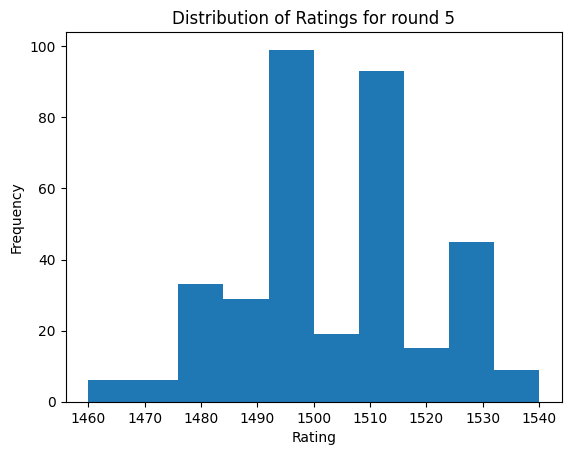

round 6 done
[('Mikko Vitug', 1548.0), ('David Africa', 1548.0), ('Tobi Leung', 1548.0), ('Pranav Gupta', 1482.568727154884), ('Sarthak Tiwari', 1482.568727154884), ('Anshuman Singh Malhotra', 1482.568727154884), ('Mohammad Huzaifa', 1516.0), ('Ahmad bin Tahir', 1516.0), ('Shezreen Shah', 1516.0), ('Kotaro Yoshida', 1500.3511989087951), ('Nasa Tsuchiya', 1500.3511989087951), ('Yuichi Masaoka', 1500.3511989087951), ('Xanthipi Pontejos', 1532.0), ('Daniel Christopher Haduca', 1532.0), ('Mezen Lababidi', 1532.0), ('Shireen Ali', 1531.991908845303), ('Jadon Lai', 1531.991908845303), ('Rohan Subagaran', 1531.991908845303), ('Nitin Kumar Saidha', 1532.0), ('Chinmaya Mohan', 1532.0), ('Ishaan Sengupta', 1532.0), ('Amy Lee', 1547.6233879260299), ('Cavan Tay', 1547.6233879260299), ('Shaun Lee', 1547.6233879260299), ('Bea Legaspi', 1532.3511948467785), ('Luigi Alcañeses', 1532.3511948467785), ('Luis Garcia', 1532.3511948467785), ('Art Joseph S. Tarranza', 1516.0001906966654), ('Lodelyn A. Prado'

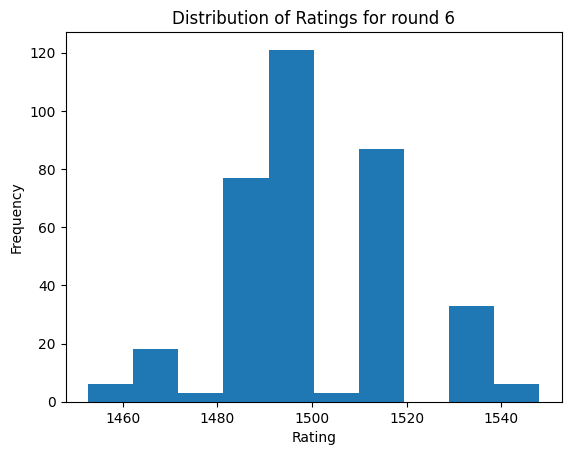

round 7 done
[('Mikko Vitug', 1555.9913281899228), ('David Africa', 1555.9913281899228), ('Tobi Leung', 1555.9913281899228), ('Pranav Gupta', 1474.2417343573525), ('Sarthak Tiwari', 1474.2417343573525), ('Anshuman Singh Malhotra', 1474.2417343573525), ('Mohammad Huzaifa', 1508.0), ('Ahmad bin Tahir', 1508.0), ('Shezreen Shah', 1508.0), ('Kotaro Yoshida', 1508.359114142669), ('Nasa Tsuchiya', 1508.359114142669), ('Yuichi Masaoka', 1508.359114142669), ('Xanthipi Pontejos', 1523.9998136942781), ('Daniel Christopher Haduca', 1523.9998136942781), ('Mezen Lababidi', 1523.9998136942781), ('Shireen Ali', 1539.9920951510248), ('Jadon Lai', 1539.9920951510248), ('Rohan Subagaran', 1539.9920951510248), ('Nitin Kumar Saidha', 1540.0), ('Chinmaya Mohan', 1540.0), ('Ishaan Sengupta', 1540.0), ('Amy Lee', 1539.632059736107), ('Cavan Tay', 1539.632059736107), ('Shaun Lee', 1539.632059736107), ('Bea Legaspi', 1540.3431082893435), ('Luigi Alcañeses', 1540.3431082893435), ('Luis Garcia', 1540.34310828934

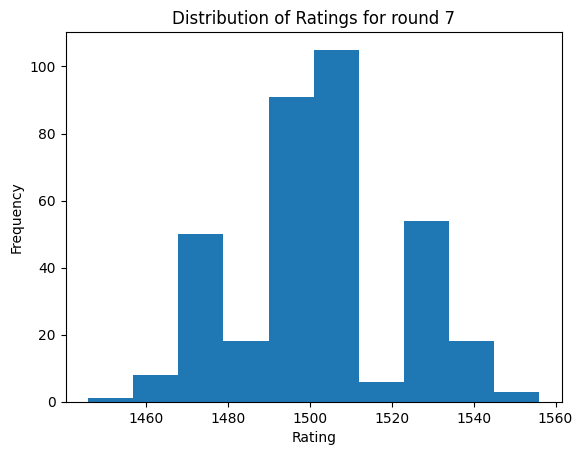

round 8 done
[('Mikko Vitug', 1563.614920246173), ('David Africa', 1563.614920246173), ('Tobi Leung', 1563.614920246173), ('Pranav Gupta', 1474.2417343573525), ('Sarthak Tiwari', 1474.2417343573525), ('Anshuman Singh Malhotra', 1474.2417343573525), ('Mohammad Huzaifa', 1500.0000000023829), ('Ahmad bin Tahir', 1500.0000000023829), ('Shezreen Shah', 1500.0000000023829), ('Kotaro Yoshida', 1516.3508495267408), ('Nasa Tsuchiya', 1516.3508495267408), ('Yuichi Masaoka', 1516.3508495267408), ('Xanthipi Pontejos', 1516.0000127804465), ('Daniel Christopher Haduca', 1516.0000127804465), ('Mezen Lababidi', 1516.0000127804465), ('Shireen Ali', 1532.000000000237), ('Jadon Lai', 1532.000000000237), ('Rohan Subagaran', 1532.000000000237), ('Nitin Kumar Saidha', 1531.9999998988947), ('Chinmaya Mohan', 1531.9999998988947), ('Ishaan Sengupta', 1531.9999998988947), ('Amy Lee', 1532.008467679857), ('Cavan Tay', 1532.008467679857), ('Shaun Lee', 1532.008467679857), ('Bea Legaspi', 1547.9670673438177), ('Lu

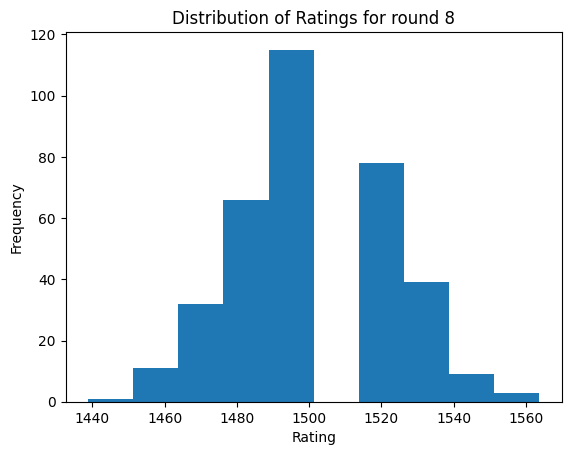

In [80]:
import matplotlib.pyplot as plt

for name,matches in school_history.items():
    rounds = len(matches)
    break
for i in range(rounds):
    try:
        for name,matches in school_history.items():
            opp = matches[i]
            opp = remove_prefix(opp, "Won against ")
            opp = remove_prefix(opp, "Lost against ")
            if matches[i].startswith("Won"):
                for person in teams[name]:
                    for opp_person in teams[opp]:
                        r.recordMatch(person,opp_person,winner=person)
            else:
                for person in teams[name]:
                    for opp_person in teams[opp]:
                        r.recordMatch(person,opp_person,winner=opp_person)
    except:
        pass
    r.applyUpdates()
    print(f"round {i+1} done")
    print(r.getRatingList())

    ratings = r.getRatingList()
    rating_values = [rating[1] for rating in ratings]

    plt.hist(rating_values, bins=10)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratings for round ' + str(i+1))
    plt.show()
        

In [81]:
rank_list = sorted(r.getRatingList(), key=lambda x: x[1], reverse=True)
for rank in rank_list:
    print(rank[0], rank[1])

Mikko Vitug 1563.614920246173
David Africa 1563.614920246173
Tobi Leung 1563.614920246173
Riva Fong 1548.3274936528453
Rivaldo Aquino 1548.3274936528453
Bea Cuizon 1548.3274936528453
V. Sayiram 1547.9999957101522
Angad Singh Chawla 1547.9999957101522
Vansh Chadha 1547.9999957101522
Bea Legaspi 1547.9670673438177
Luigi Alcañeses 1547.9670673438177
Luis Garcia 1547.9670673438177
Adib Faisal 1532.3508456223572
ZH Masud 1532.3508456223572
Seeam Marjan 1532.3508456223572
Amy Lee 1532.008467679857
Cavan Tay 1532.008467679857
Shaun Lee 1532.008467679857
Soumitra Tonapi 1532.00826081054
Debayan Bhattacharya 1532.00826081054
Manasija Das 1532.00826081054
Gabrielle Pacaño 1532.0077185432533
Macha Cual 1532.0077185432533
David Mencias 1532.0077185432533
Vigneshwaran A/L Sundrasagar 1532.0005461655041
Raymond Kimura 1532.0005461655041
Tanish Rajah 1532.0005461655041
Wayne Lim 1532.0003681083308
Ha Duy Thanh 1532.0003681083308
Soh Kay Boon 1532.0003681083308
Ian Dylan Chai 1532.0001776253953
Rdu Di

In [95]:
import os
file_path = os.path.join(os.getcwd(), 'rating_list.txt')

rating_dict = {}

with open(file_path, 'r') as file:
    for line in file:
        name, rating = line.strip().split(': ')
        rating_dict[name] = float(rating)

for name, rating in r.getRatingList():
    rating_dict[name] = float(rating)

with open(file_path, 'w') as file:
    for name, rating in rating_dict.items():
        file.write(f'{name}: {rating}\n')
